# Notebook with Code to Produce the Plots in Issue [2](https://messenger.substack.com/p/thinking-in-public-the-case-for-gender-bba)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Download and Cleaning
1. Download two data files from the World Bank - [GDP per Capita](https://data.worldbank.org/indicator/NY.GDP.MKTP.PP.KD) and [Female Workforce Participation](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.ZS).
2. In both files, perform the following operations:
 - Delete rows 1-4 (both rows included)
 - Delete column B
 - Then delete all columns from C to AG (both columns included)
 - Then delete column AK
At the end of these operations, you should be left with the columns named "Country Name" and "Indicator Name" and one column for each year from 1990 - 2023.
3. Delete the first row from from the GDP per Capita file.
4. Append all the data in the GDP per Capita file below the Female Workforce participation data in the latter file.
5. Save that file as `world_data.csv`.
6. Upload the file directly to Colab (click on the folder icon on the
left hand menu, and drag and drop the downloaded file to the `root` folder).

## Load and Explore the Data

In [ ]:
# Load the cleaned data file
file_path_new = '/content/world_data.csv'
df_new = pd.read_csv(file_path_new)
df_new.head()

,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,"Labor force participation rate, female (% of f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,"Labor force participation rate, female (% of f...",65.537699,65.692338,65.851327,65.930883,66.137332,66.334307,66.327499,66.238183,...,64.161067,63.712325,63.120779,62.395474,61.840469,61.356993,59.773010,60.279546,60.445144,64.075207
2,Afghanistan,"Labor force participation rate, female (% of f...",15.789000,15.740000,15.660000,15.544000,15.393000,15.226000,15.044000,14.848000,...,18.107000,19.113000,20.156000,21.240000,19.808000,18.304000,16.473000,14.666000,5.159000,5.155000
3,Africa Western and Central,"Labor force participation rate, female (% of f...",69.940137,69.931723,69.813229,69.779219,69.738393,69.677721,69.579073,69.492873,...,66.781811,66.461390,66.233455,65.723732,65.425073,65.178224,64.439111,64.780003,64.738521,66.349345
4,Angola,"Labor force participation rate, female (% of f...",75.607000,75.572000,75.540000,75.513000,75.492000,75.481000,75.480000,75.486000,...,74.167000,73.933000,73.698000,73.461000,73.224000,72.985000,72.731000,74.695000,73.179000,73.224000


In [ ]:
# Get a sorted list of all unique country names in the dataset
all_country_names = sorted(df_new["Country Name"].unique())

# Display them for manual review of non-country entities
all_country_names

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East

## Correlations between GDP per Capita and Female Labour Force Participation

<ipython-input-4-f9b4f9825c8a>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_df = df_pivot_filtered.groupby("Country Name").apply(


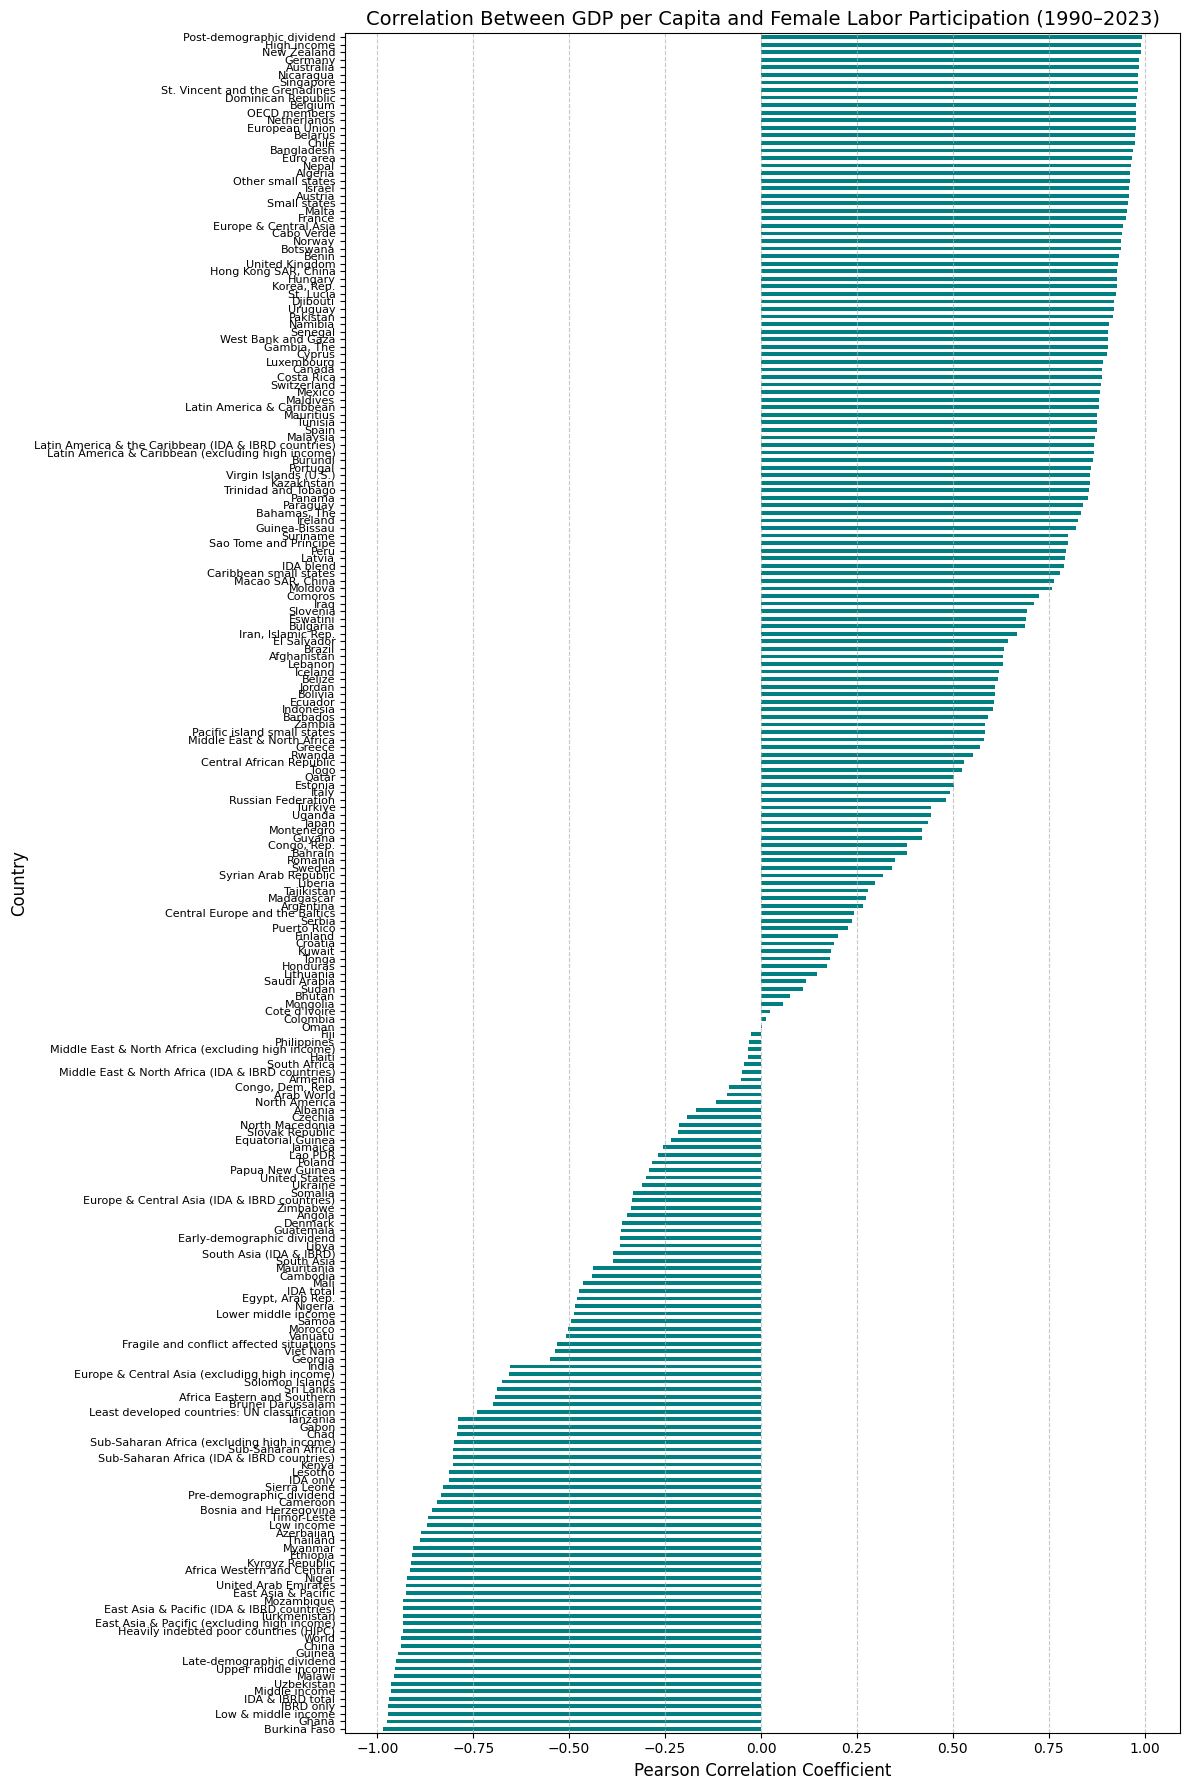

In [ ]:
# Melt to long format
df_long_filtered = df_new.melt(id_vars=["Country Name", "Indicator Name"],
                                    var_name="Year", value_name="Value")
df_long_filtered["Year"] = pd.to_numeric(df_long_filtered["Year"], errors="coerce")

# Pivot so that both indicators are columns
df_pivot_filtered = df_long_filtered.pivot_table(index=["Country Name", "Year"],
                                                 columns="Indicator Name",
                                                 values="Value").dropna()

# Rename for simplicity
df_pivot_filtered.columns = ["Female Participation", "GDP per Capita"]
df_pivot_filtered = df_pivot_filtered.reset_index()

# Compute correlation per country
correlation_df = df_pivot_filtered.groupby("Country Name").apply(
    lambda x: x["Female Participation"].corr(x["GDP per Capita"])
).dropna().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 18))
correlation_df.plot(kind='barh', color='teal')

plt.title(
    "Correlation Between GDP per Capita and Female Labor Participation (1990–2023)",
    fontsize=14)
plt.xlabel("Pearson Correlation Coefficient", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Export correlation data as CSV
# This is the file to upload to Data Wrapper
output_path = "gdp_female_participation_correlation.csv"
correlation_df.to_csv(output_path, header=["Correlation"])

# India GDP per Capita vs. Female labour force participation rate chart

In [ ]:
df_india = df_long_filtered[df_long_filtered["Country Name"] == "India"]
df_india

,Country Name,Indicator Name,Year,Value
109,India,"Labor force participation rate, female (% of f...",1990,30.225000
375,India,"GDP per capita, PPP (constant 2021 internation...",1990,2203.147039
641,India,"Labor force participation rate, female (% of f...",1991,30.336000
907,India,"GDP per capita, PPP (constant 2021 internation...",1991,2178.685915
1173,India,"Labor force participation rate, female (% of f...",1992,30.459000
...,...,...,...,...
16867,India,"GDP per capita, PPP (constant 2021 internation...",2021,8050.018575
17133,India,"Labor force participation rate, female (% of f...",2022,29.479000
17399,India,"GDP per capita, PPP (constant 2021 internation...",2022,8544.688884
17665,India,"Labor force participation rate, female (% of f...",2023,31.243000


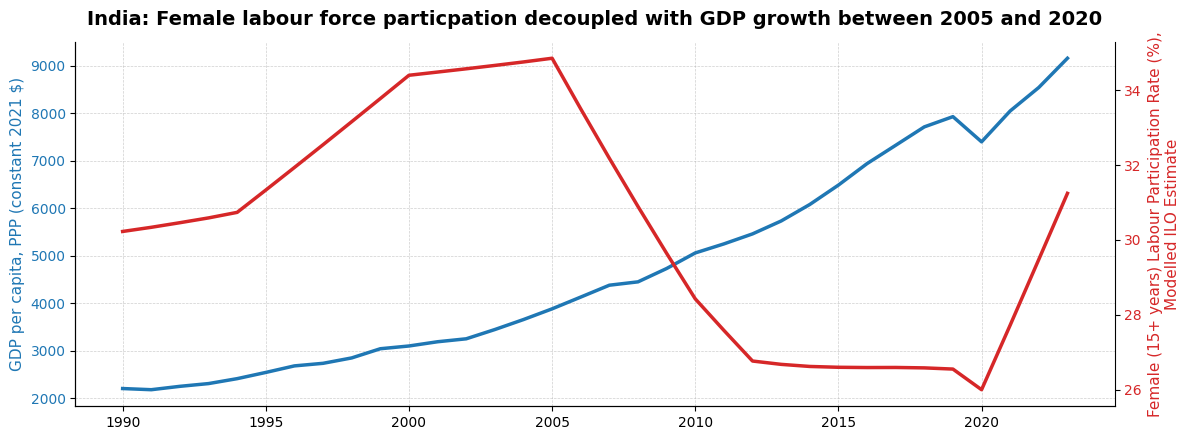

In [ ]:
# Define refined color palette
gdp_color = "#1f77b4"
participation_color = "#d62728"

# Create wide rectangular figure
fig, ax = plt.subplots(figsize=(12, 4.5))  # wider and flatter

# Subset data
gdp = df_india[df_india["Indicator Name"] ==
               "GDP per capita, PPP (constant 2021 international $)"]
participation = df_india[df_india["Indicator Name"].str.startswith(
    "Labor force participation rate")]

# Plot GDP on primary axis
ax.plot(
    gdp["Year"],
    gdp["Value"],
    color=gdp_color,
    linewidth=2.5,
    label="GDP per capita (PPP)"
)
ax.set_ylabel("GDP per capita, PPP (constant 2021 $)", color=gdp_color, fontsize=11)
ax.tick_params(axis='y', labelcolor=gdp_color)
ax.set_title((f"India: Female labour force particpation decoupled with GDP"
  f" growth between 2005 and 2020"), fontsize=14, weight='bold', pad=12)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Plot Participation on secondary axis
ax2 = ax.twinx()
ax2.plot(
    participation["Year"],
    participation["Value"],
    color=participation_color,
    linewidth=2.5,
    label="Female Labour Participation Rate"
)
ax2.set_ylabel(
    "Female (15+ years) Labour Participation Rate (%),\nModelled ILO Estimate",
    color=participation_color, fontsize=11)
ax2.tick_params(axis='y', labelcolor=participation_color)
ax2.spines['top'].set_visible(False)

# Layout
plt.tight_layout()
plt.show()
